# 并查集的局限性

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target
X.shape

(150, 2)

In [6]:
def plot_desicion_boundry(model, axis):
    # axis 横纵坐标轴的范围
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])* 100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#ED9A9A","#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

<ipython-input-6-17721d6e6521>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


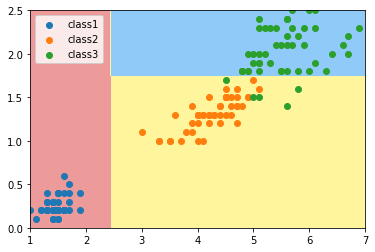

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

plot_desicion_boundry(dt_clf, [1, 7, 0, 2.5])
plt.scatter(X[y==0, 0], X[y==0, 1], label="class1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="class2")
plt.scatter(X[y==2, 0], X[y==2, 1], label="class3")
plt.legend()
plt.show()

In [8]:
# 删除一个样本点(索引138)
X_new = np.delete(X, 138, axis=0)
y_new = np.delete(y, 138)

In [9]:
X_new.shape

(149, 2)

In [11]:
y_new.shape

(149,)

<ipython-input-6-17721d6e6521>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


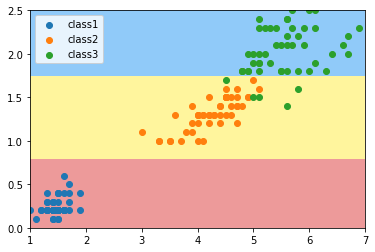

In [16]:
dt_clf_new = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf_new.fit(X_new, y_new)

plot_desicion_boundry(dt_clf_new, [1, 7, 0, 2.5])
plt.scatter(X[y==0, 0], X[y==0, 1], label="class1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="class2")
plt.scatter(X[y==2, 0], X[y==2, 1], label="class3")
plt.legend()
plt.show()

# 同样的参数，生成的边界不一样